# Homework - cnn classifier for telling apart dinosaurs from dragons

Build a model for predicting if we have an image of a dino or a dragon.

## Dataset

For this, we will use the "Dino or Dragon?" dataset that can be downloaded from Kaggle - https://www.kaggle.com/datasets/agrigorev/dino-or-dragon.
This dataset was generated using stable-diffusion text-to-image generator.

You can get a wget-able version here:
```
wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
unzip dino-dragon.zip
```
- The dataset contains around 1900 images of dinos and around 1900 images of dragons.
- The dataset contains separate folders for training and validation.

Note: You will need an environment with a GPU for this homework. You can also use a computer without a GPU (e.g. your laptop), but it will be slower.

In [1]:
# Download dataset - ignore if already available
# !wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
# !unzip dino-dragon.zip

In [2]:
# dataset size
!du -sh ./test
!du -sh ./train

22M	./test
87M	./train


In [3]:
# number of samples
!ls ./train/dragon | wc -l
!ls ./train/dino | wc -l
!ls ./test/dragon | wc -l
!ls ./test/dino | wc -l

767
827
198
196


In [4]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

print(f'Tensorflow version: {tf.__version__}')

2022-11-12 16:47:43.596421: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Tensorflow version: 2.9.1


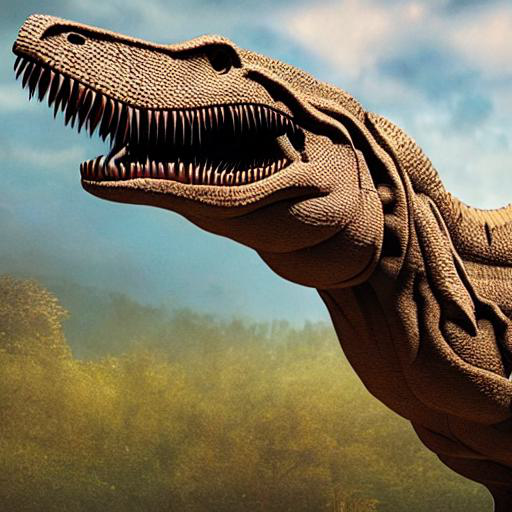

In [5]:
# load one image
path = './train/dino'
name = '0284b36b-b92c-4c1d-a8d7-4ba26f7bfe83.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

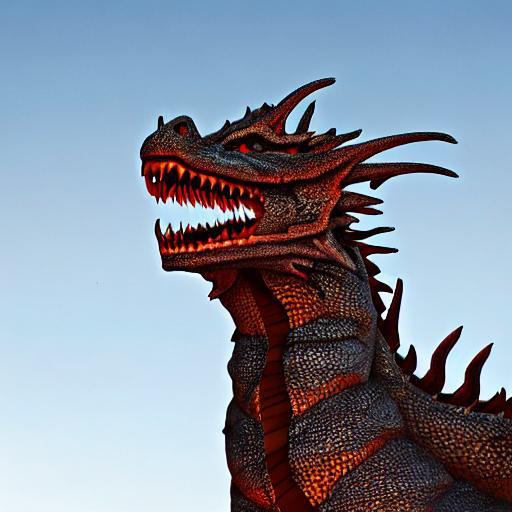

In [6]:
# load one image
path = './train/dragon'
name = '011689fa-0178-4721-bcb0-6e63c6814a98.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

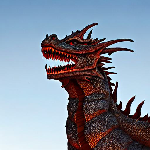

In [7]:
# change size
img = load_img(fullname, target_size=(150, 150))
img

In [8]:
# convert image to array
x = np.array(img)
x.shape

(150, 150, 3)

In [9]:
x

array([[[108, 152, 191],
        [108, 152, 191],
        [107, 151, 190],
        ...,
        [112, 154, 194],
        [112, 154, 194],
        [112, 154, 194]],

       [[110, 154, 193],
        [110, 154, 193],
        [109, 153, 192],
        ...,
        [112, 154, 194],
        [112, 154, 194],
        [112, 154, 194]],

       [[110, 154, 193],
        [110, 154, 193],
        [111, 155, 194],
        ...,
        [111, 153, 193],
        [113, 155, 195],
        [113, 155, 195]],

       ...,

       [[234, 245, 249],
        [234, 245, 249],
        [233, 244, 248],
        ...,
        [ 14,  13,  11],
        [ 20,  12,  10],
        [ 26,   8,   8]],

       [[235, 246, 250],
        [234, 245, 249],
        [234, 245, 249],
        ...,
        [ 19,  21,  20],
        [ 21,  19,  20],
        [ 25,  16,  19]],

       [[237, 248, 252],
        [235, 246, 250],
        [234, 245, 249],
        ...,
        [ 25,  23,  24],
        [ 28,  24,  25],
        [ 30,  19,  25]]

## convolutional neural networks

Build cnn

In [10]:
# parameters
train_dir = './train'
val_dir = './test'
input_size = (150, 150)
batch_size = 20
epochs = 10
learning_rate = 0.002
momentum = 0.8
steps_per_epoch=10
validation_steps=5

In [11]:
# Outlining the model/architecture of our CNN
# CONV -> MAXPOOL -> FLATTEN -> DENSE -> DENSE
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)), 
    # (2,2) is the default pool size so we could have just used MaxPooling2D() with no explicit arguments
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1, activation='sigmoid') # sigmoid activation here, for binary classification
])

# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()

# optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

# Compiling the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

2022-11-12 16:47:45.296095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 16:47:45.302816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 16:47:45.303404: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 16:47:45.304332: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

Question 1
- Since we have a binary classification problem, what is the best loss function for us?

Answer: **binary crossentropy**

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

Question 2
- What's the total number of parameters of the model? You can use the summary method for that.

Answer: **11215873**

## Data generators

In [13]:
# train and val data generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    shuffle=True,
    target_size=input_size,
    batch_size=batch_size
)

val_ds = val_datagen.flow_from_directory(
    val_dir,
    class_mode='binary',
    shuffle=True,
    target_size=input_size,
    batch_size=batch_size
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [14]:
for data_batch, labels_batch in train_ds:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## Training

In [15]:
# Train the network
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    # steps_per_epoch=steps_per_epoch,
    # validation_steps=validation_steps,
    # verbose=2
)

Epoch 1/10


2022-11-12 16:47:47.573141: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-12 16:47:48.281863: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-12 16:47:48.282782: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-12 16:47:48.282820: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-12 16:47:48.283740: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-12 16:47:48.283816: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


80/80 [==============================] - 11s 103ms/step - loss: 0.5673 - accuracy: 0.7083 - val_loss: 0.3846 - val_accuracy: 0.8553
Epoch 2/10
80/80 [==============================] - 8s 102ms/step - loss: 0.3752 - accuracy: 0.8425 - val_loss: 0.3683 - val_accuracy: 0.8376
Epoch 3/10
80/80 [==============================] - 8s 101ms/step - loss: 0.3076 - accuracy: 0.8770 - val_loss: 0.3170 - val_accuracy: 0.8706
Epoch 4/10
80/80 [==============================] - 8s 102ms/step - loss: 0.2559 - accuracy: 0.8996 - val_loss: 0.2864 - val_accuracy: 0.8909
Epoch 5/10
80/80 [==============================] - 8s 102ms/step - loss: 0.2176 - accuracy: 0.9272 - val_loss: 0.2915 - val_accuracy: 0.8731
Epoch 6/10
80/80 [==============================] - 8s 101ms/step - loss: 0.1974 - accuracy: 0.9348 - val_loss: 0.3194 - val_accuracy: 0.8579
Epoch 7/10
80/80 [==============================] - 8s 101ms/step - loss: 0.1762 - accuracy: 0.9410 - val_loss: 0.3563 - val_accuracy: 0.8426
Epoch 8/10
80/80

In [16]:
accuracy_median = np.median(history.history['accuracy'])
accuracy_median

0.9309912025928497

Question 3
- What is the median of training accuracy for all the epochs for this model?

Answer: **0.90**

In [17]:
std_loss = np.std(history.history['loss'])
std_loss

0.13502805662318368

Question 4
- What is the standard deviation of training loss for all the epochs for this model?

Answer: **0.11**

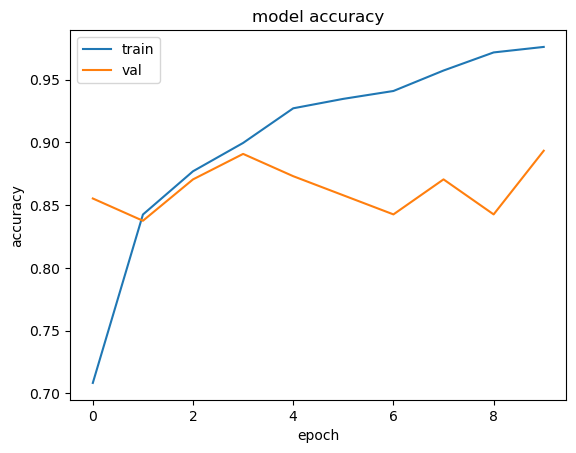

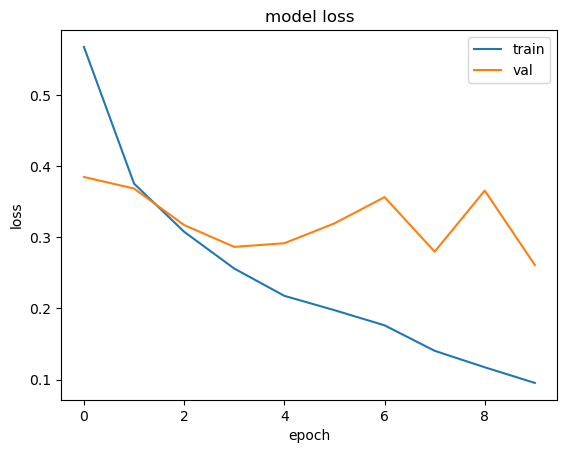

In [18]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.figure()

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.show()

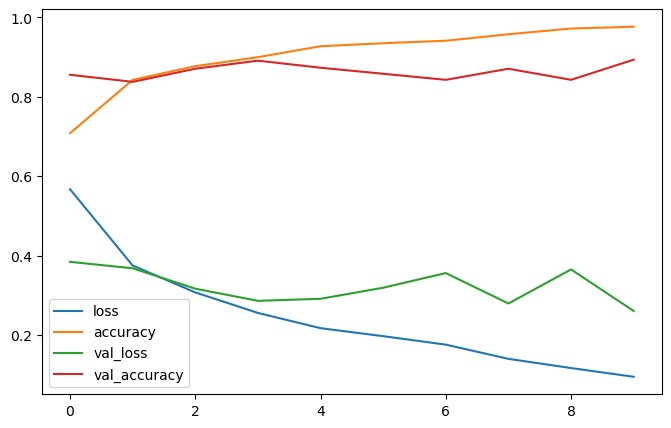

In [19]:
# alternate way
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

## Data Augmentation

In [20]:
# train and val data generators with data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    shuffle=True,
    target_size=input_size,
    batch_size=batch_size
)

val_ds = val_datagen.flow_from_directory(
    val_dir,
    class_mode='binary',
    shuffle=True,
    target_size=input_size,
    batch_size=batch_size
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [21]:
for data_batch, labels_batch in train_ds:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## Model fitting (augmented) and Accuracy/Loss Evaluation

In [22]:
# Train the network
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    # steps_per_epoch=steps_per_epoch,
    # validation_steps=validation_steps,
    # verbose=2
)

Epoch 1/10
80/80 [==============================] - 15s 182ms/step - loss: 0.4648 - accuracy: 0.7848 - val_loss: 0.6430 - val_accuracy: 0.7056
Epoch 2/10
80/80 [==============================] - 14s 181ms/step - loss: 0.4055 - accuracy: 0.8080 - val_loss: 0.5343 - val_accuracy: 0.7716
Epoch 3/10
80/80 [==============================] - 15s 183ms/step - loss: 0.4267 - accuracy: 0.8049 - val_loss: 0.3606 - val_accuracy: 0.8376
Epoch 4/10
80/80 [==============================] - 15s 182ms/step - loss: 0.4057 - accuracy: 0.8118 - val_loss: 0.7363 - val_accuracy: 0.7107
Epoch 5/10
80/80 [==============================] - 15s 182ms/step - loss: 0.3831 - accuracy: 0.8281 - val_loss: 0.3695 - val_accuracy: 0.8426
Epoch 6/10
80/80 [==============================] - 15s 182ms/step - loss: 0.3718 - accuracy: 0.8363 - val_loss: 0.2901 - val_accuracy: 0.8909
Epoch 7/10
80/80 [==============================] - 15s 182ms/step - loss: 0.3571 - accuracy: 0.8507 - val_loss: 0.3909 - val_accuracy: 0.8401

In [23]:
mean_val_loss_aug = np.mean(history.history['loss'])
mean_val_loss_aug

0.3813351094722748

Question 5
- What is the mean of validation loss for all the epochs for the model trained with augmentations?

Answer: **0.37**

In [24]:
a = history.history['val_accuracy']
a[5:10]

[0.8908629417419434,
 0.8401015400886536,
 0.8324872851371765,
 0.7715736031532288,
 0.8654822111129761]

In [25]:
np.average(a[5:10])

0.8401015162467956

In [26]:
avg_val_accuracy = np.average(history.history['val_accuracy'][5:10])
avg_val_accuracy

0.8401015162467956

Question 6
- What's the average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

Answer: **0.84**

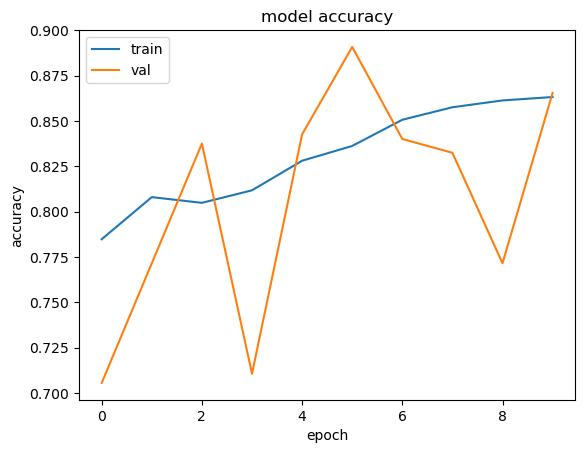

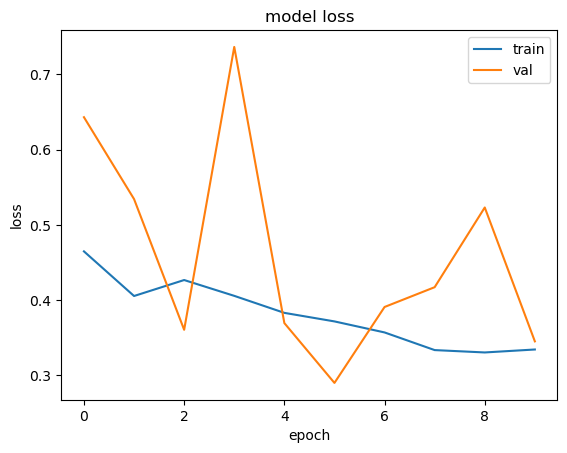

In [28]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.figure()

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.show()